In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import random

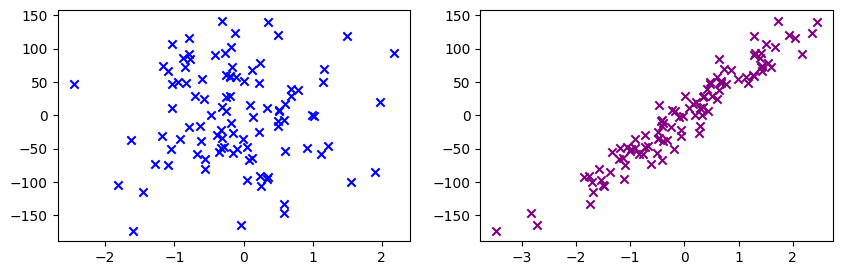

In [7]:
size = 100
X, y = make_regression(n_samples=size, n_features=2, n_targets=1, noise=20, random_state=15)
m = len(X[:,0])
X = np.concatenate((X,np.ones((m,1))),axis=1)
n = len(X[0,:])
X1 = X[:,0]
X2 = X[:,1]

fig = plt.figure(figsize=(10,3))

axes1 = fig.add_subplot(121)
axes1.scatter(X1, y, color="blue", marker="x")

axes2 = fig.add_subplot(122)
axes2.scatter(X2, y, color="purple", marker="x")

plt.show()

In [8]:
class stochasticGDRegressor:
    def __init__(self, epochs, learning_rate):
        
        self.epochs = epochs
        self.lr = learning_rate
    
    def fit(self, X, y):
        self.m = X.shape[0]
        self.n = X.shape[1]
        self.b = np.ones(n)
        self.b[n-1]=0

        for i in range(self.epochs):
            for j in range(self.m):
                idx = random.sample(range(m),1)
                for c in range(self.n):
                    y_hat = np.dot(X[idx], self.b)
                    db = (-2)*np.sum(y[idx] - y_hat)
                    self.b[c] = self.b[c] - self.lr*db
        return self.b

[10.61186792 57.11594892  0.8807081 ]


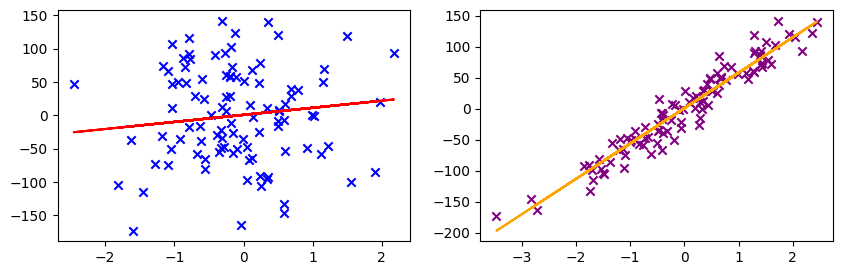

In [9]:
bGD = stochasticGDRegressor(100, 0.01)
b = bGD.fit(X, y)
print(b)

fig = plt.figure(figsize=(10,3))

axes1 = fig.add_subplot(121)
axes1.scatter(X1, y, color="blue", marker="x")
axes1.plot(X1, b[0]*X[:,0]+b[n-1], color="red")

axes2 = fig.add_subplot(122)
axes2.scatter(X2, y, color="purple", marker="x")
axes2.plot(X2, b[1]*X[:,1]+b[n-1], color="orange")

plt.show()